<a href="https://colab.research.google.com/github/Mmbsaksd/Online-Retail/blob/main/Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Preprocessing**


In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
df = pd.read_csv('/content/Online_Retail.xlsx - Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [3]:
#Print train of tadaset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [4]:
#Checking shape of dataset
df.shape

(541909, 8)

In [5]:
#Checking type of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
#Checking Null Value
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [7]:
#Dropping null value in dataset
df.dropna(inplace=True)

In [8]:
#Checking shape after dropping null value
df.shape

(406829, 8)

In [9]:
#Converting the invoice number columns into str
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

#Removing the row which are cancelled
df= df[~df['InvoiceNo'].str.contains('C')]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [10]:
#Checking the shape 
df.shape

(397924, 8)

In [11]:
#Checking the columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
#Checking it describtion
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


#**Exploratory data analysis**


In [13]:
#Creating DataFrame on description and count
Description_df = df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index':'Description_Name'},inplace=True)
Description_df.rename(columns={'Description':'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


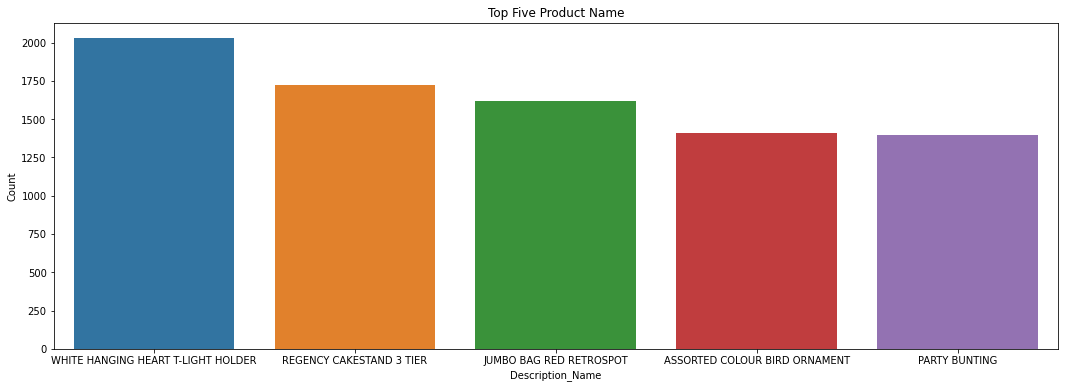

In [14]:
#Plotting on barplot
plt.figure(figsize=(18,6))
plt.title('Top Five Product Name')
sns.barplot(x='Description_Name',y='Count', data=Description_df[:5])

**Top Five product based on selling**


1.   Whit Hanging Heart Light Holder
2.   Regency Cake Stand 3 Tier
3.   Jumbo Bang Red Retrospect
4.   Assorted Colour Bird Arangment
5.   Party Bunting

In [15]:
#Printing last five rows
Description_df.tail()

,Description_Name,Count
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


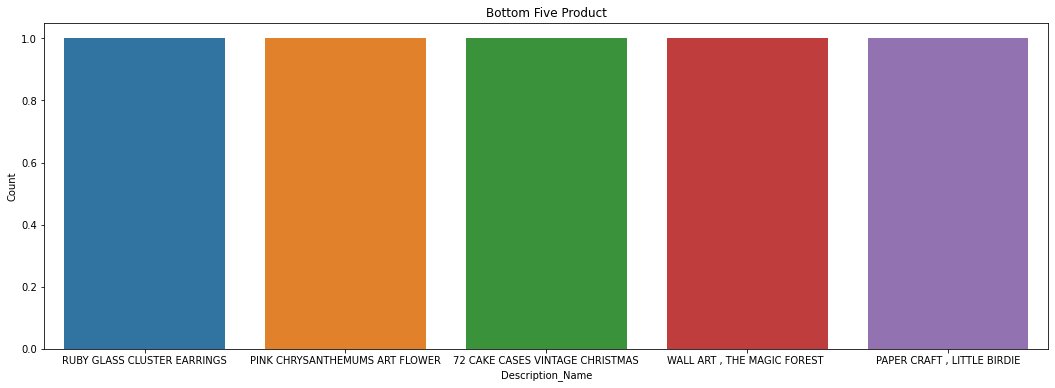

In [16]:
#Plotting bottom five Product Based On Selling
plt.figure(figsize=(18,6))
plt.title('Bottom Five Product')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])

**Bottom Five Product**

1.   Ruby GlassCluster Earning
2.   Pink Chrysanthemums Art Flower
3.   Cake Case Vintage Christmas
4    Wall Art The Magic Forest
5.   Paper Craft Little Birdie




In [17]:
#Creating the table of stock distribution
Stockcode_df = df['StockCode'].value_counts().reset_index()
Stockcode_df.rename(columns={'index':'StockCode_Name'},inplace=True)
Stockcode_df.rename(columns={'StockCode':'Count'},inplace=True)
Stockcode_df.head()

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


In [18]:
#Printing Bottom Five rows
Stockcode_df.head()

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


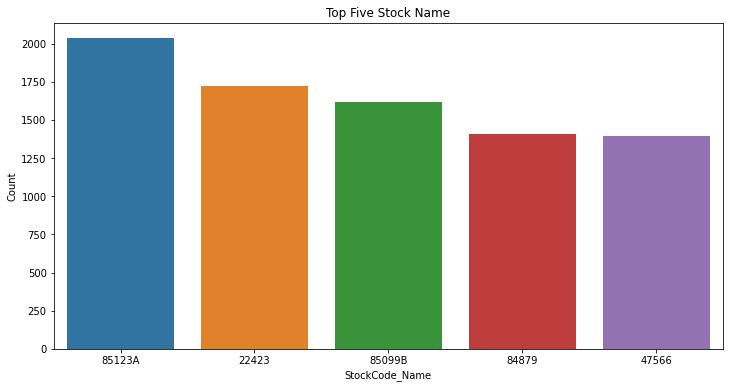

In [19]:
#Plotting Top Five Stock
plt.figure(figsize=(12,6))
plt.title('Top Five Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=Stockcode_df[:5])

**Top Five Stock Name**


1.   85123A
2.   22423
3.   85099B
4.   83879
5.   47566


In [20]:
#List of bottom 5 stockcode name
Stockcode_df.tail()

,StockCode_Name,Count
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1
3664,23843,1


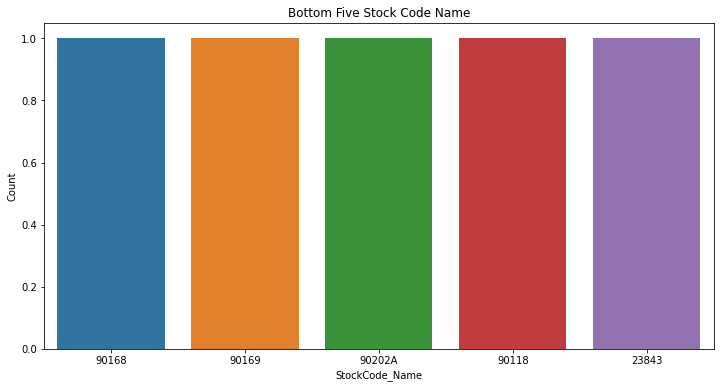

In [21]:
#Plotting bottom five stockcode name
plt.figure(figsize=(12,6))
plt.title('Bottom Five Stock Code Name')
sns.barplot(x='StockCode_Name',y='Count',data=Stockcode_df[-5:])

In [22]:
#Creating the table of countribution with its distribution
country_df = df['Country'].value_counts().reset_index()
country_df.rename(columns={'index':'Country_Name'},inplace=True)
country_df.rename(columns={'Country':'Count'},inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


In [23]:
#Print tail of countries distribution
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


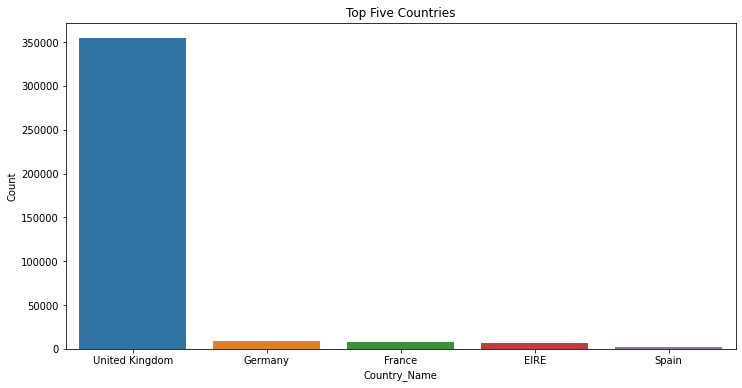

In [24]:
#Ploting top five countries
plt.figure(figsize=(12,6))
plt.title('Top Five Countries')
sns.barplot(x='Country_Name', y='Count',data=country_df[:5] )

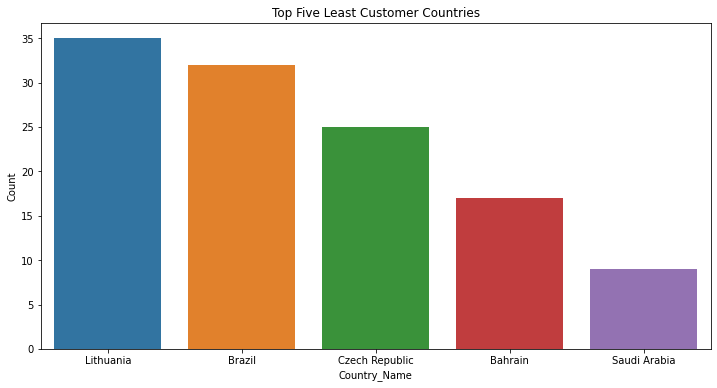

In [25]:
#Plotting top least customer countries
plt.figure(figsize=(12,6))
plt.title('Top Five Least Customer Countries')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

**Observation On Countries Distribution**

*   Most customer are belong to UK, then Germany, France, EIFE and Spain respectively
*   Least customer company are Greece, United Arab Emirate, Austria, Israel and Soudia Arabia



In [26]:
#Checking customer of soudia arabia
df[df['Country']=='Saudi Arabia']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
100810,544838,22915,ASSORTED BOTTLE TOP MAGNETS,12,2/24/11 10:34,0.42,12565.0,Saudi Arabia
100811,544838,22363,GLASS JAR MARMALADE,6,2/24/11 10:34,2.95,12565.0,Saudi Arabia
100812,544838,22362,GLASS JAR PEACOCK BATH SALTS,6,2/24/11 10:34,2.95,12565.0,Saudi Arabia
100813,544838,22361,GLASS JAR DAISY FRESH COTTON WOOL,6,2/24/11 10:34,2.95,12565.0,Saudi Arabia
100814,544838,22553,PLASTERS IN TIN SKULLS,12,2/24/11 10:34,1.65,12565.0,Saudi Arabia
100815,544838,22555,PLASTERS IN TIN STRONGMAN,12,2/24/11 10:34,1.65,12565.0,Saudi Arabia
100816,544838,22556,PLASTERS IN TIN CIRCUS PARADE,12,2/24/11 10:34,1.65,12565.0,Saudi Arabia
100817,544838,20781,GOLD EAR MUFF HEADPHONES,2,2/24/11 10:34,5.49,12565.0,Saudi Arabia
100818,544838,22969,HOMEMADE JAM SCENTED CANDLES,12,2/24/11 10:34,1.45,12565.0,Saudi Arabia


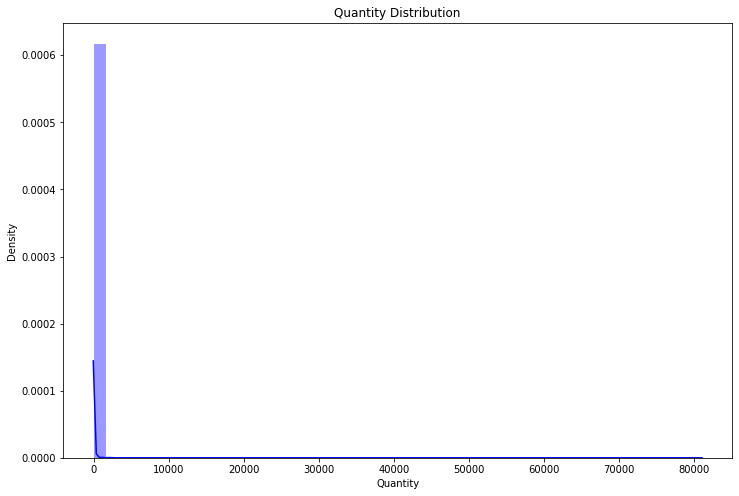

In [27]:
#Plotting Distribution of Quantity
plt.figure(figsize=(12,8))
plt.title("Quantity Distribution")
sns.distplot(df['Quantity'],color="B")

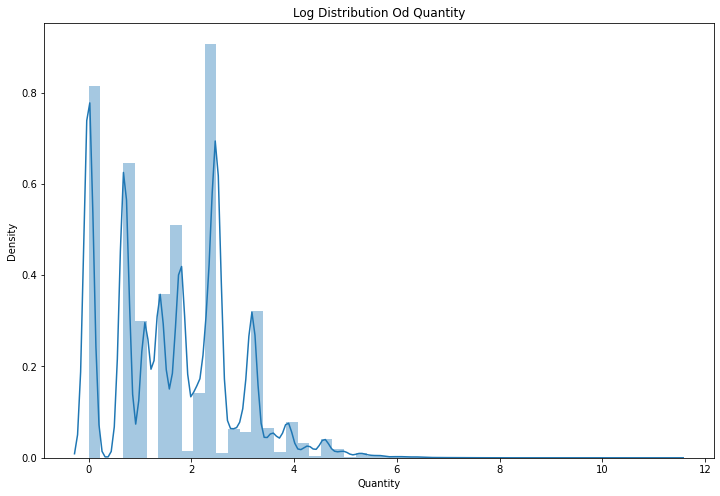

In [28]:
#Distribution Of Quantity with log
plt.figure(figsize=(12,8))
plt.title('Log Distribution Od Quantity')
sns.distplot(np.log(df['Quantity']))

In [29]:
#Checking unique value of Quantity
df['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    19,    39,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,   208,  1008,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   186,   114,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    33,

In [30]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


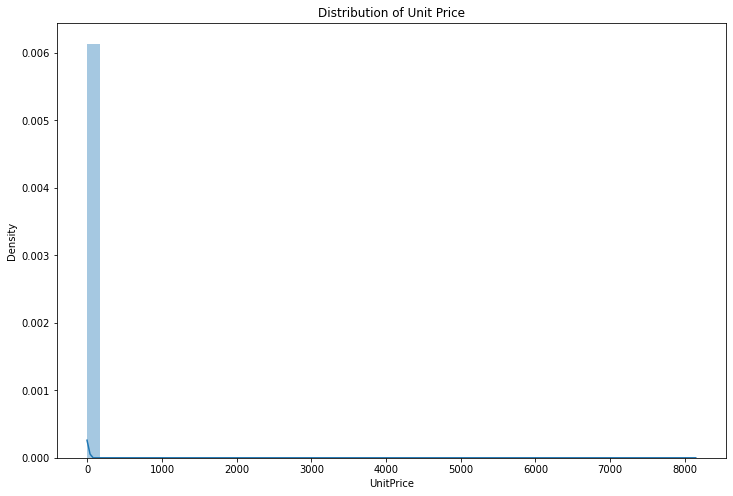

In [31]:
#Checking the disatribution of unitprice
plt.figure(figsize=(12,8))
plt.title('Distribution of Unit Price')
sns.distplot(df['UnitPrice'])

In [32]:
#Checking the dispersion of price unit
df['UnitPrice'].describe([0.75,0.90,0.95,0.99])

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
50%           1.950000
75%           3.750000
90%           6.350000
95%           8.500000
99%          14.950000
max        8142.750000
Name: UnitPrice, dtype: float64

In [33]:
#Checking values wethere any values less than zero
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [34]:
#Selecting data only unit have greater than zero
df = df[df['UnitPrice']>0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


#**Feature engineering**

In [35]:
#Createing columns for day, dayname, year,month, hour, minute 
#with excrating respective data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['WeekDay'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day']= df['InvoiceDate'].apply(lambda x: x.day)
df['Year'] = df['InvoiceDate'].apply(lambda x: x.year)
#df['Month'] = df['InvoiceDate'].apply(lambda x: x.month)
df['Hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['Minute'] = df['InvoiceDate'].apply(lambda x: x.minute)

In [36]:
#Create New feature of total amount
df['Total Amount'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34


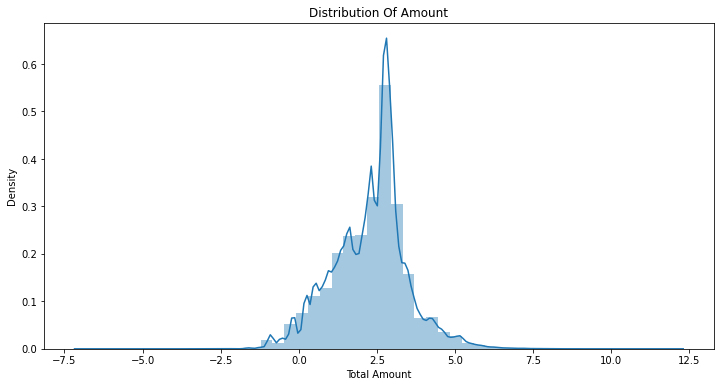

In [37]:
#Plotting distribution of total amount
plt.figure(figsize=(12,6))
plt.title("Distribution Of Amount")
sns.distplot(np.log(df['Total Amount']))

In [38]:
#Checking statistical distribution description of totalAmount
df['Total Amount'].describe([0.75,0.90, 0.95, 0.99])

count    397884.000000
mean         22.397000
std         309.071041
min           0.001000
50%          11.800000
75%          19.800000
90%          35.400000
95%          67.500000
99%         202.500000
max      168469.600000
Name: Total Amount, dtype: float64

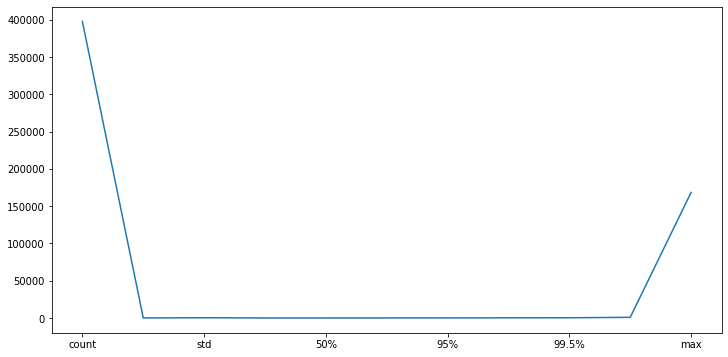

In [39]:
#plotting description
plt.figure(figsize=(12,6))
df['Total Amount'].describe([0.90, 0.95, 0.99,0.995, 0.999]).plot()

In [40]:
#Create columns to count days of week
week_day = df['WeekDay'].value_counts().reset_index()
week_day.rename(columns={'index':'Week_Name','WeekDay':'Count'},inplace=True)
week_day.head()

,Week_Name,Count
0,Thursday,80035
1,Wednesday,68885
2,Tuesday,66473
3,Monday,64893
4,Sunday,62773


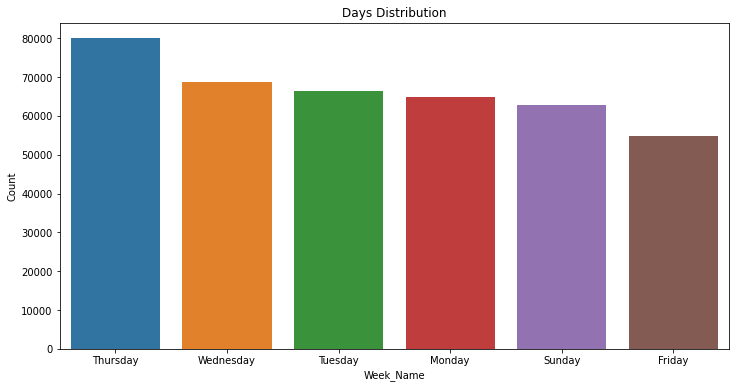

In [41]:
#Plotting Day Names 
plt.figure(figsize=(12,6))
plt.title("Days Distribution")
sns.barplot(x='Week_Name',y='Count',data=week_day)

In [42]:
#Distribution of sales by month
month_df = df['Month'].value_counts().reset_index()
month_df.rename(columns={'index':'Month_Name','Month':'Count'},inplace=True)
month_df.head()

,Month_Name,Count
0,November,64531
1,October,49554
2,December,43461
3,September,40028
4,May,28320


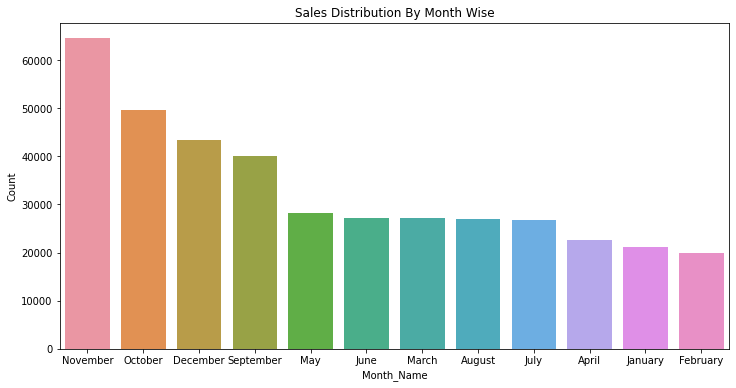

In [43]:
#Plotting distribution of sales by month
plt.figure(figsize=(12,6))
plt.title("Sales Distribution By Month Wise")
sns.barplot(x='Month_Name',y='Count', data=month_df)

**Most sales happens on the month of November and least sales happens on February**

In [44]:
#Creating the table on hours distribution
hour_df = df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index':'Hour_times','Hour':'Count'},inplace=True)
hour_df

,Hour_times,Count
0,12,72065
1,13,64026
2,14,54118
3,11,49084
4,15,45369
5,10,37997
6,16,24089
7,9,21944
8,17,13071
9,8,8690


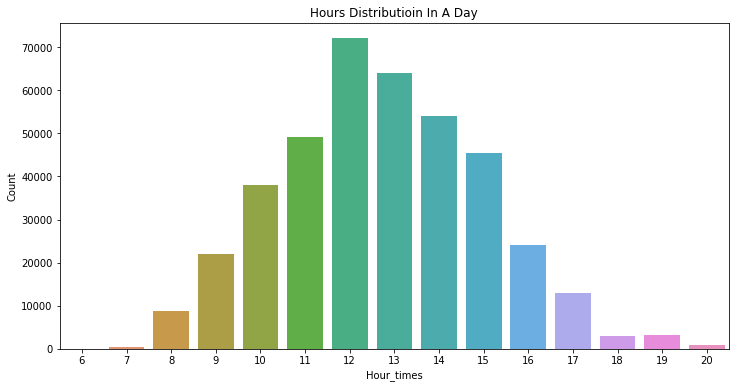

In [45]:
#Plotting distribution of hours
plt.figure(figsize=(12,6))
plt.title("Hours Distributioin In A Day")
sns.barplot(x='Hour_times', y='Count',data=hour_df)

In [46]:
#defining the function for binning the times
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16):
    return 'After Noon'
  else:
    return 'Evening'


In [47]:
#Appling the defining function for time type columns
df['Time_type']= df['Hour'].apply(time_type)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total Amount,Time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning


In [48]:
#Appling the defining function for time type columns
df['Time_type']= df['Hour'].apply(time_type)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total Amount,Time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning


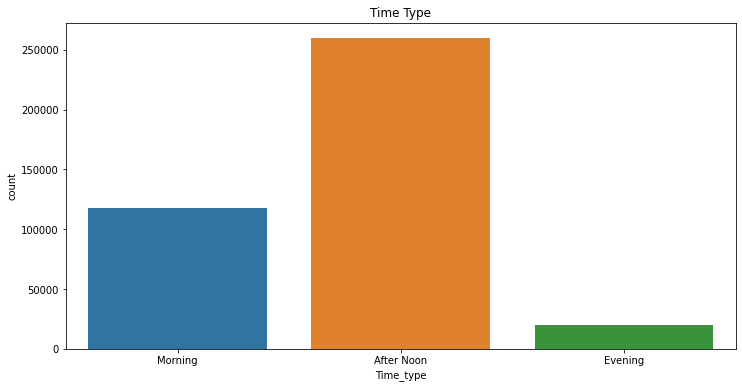

In [49]:
#Ploting count plot on time type
plt.figure(figsize=(12,6))
plt.title('Time Type')
sns.countplot(x='Time_type',data=df)

**Most purchase happens on after noon then morning then evening**

In [50]:
#Checking dataframe after some preprocessing
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total Amount,Time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning


In [51]:
#Creating RFM model
import datetime as dt

#creating last date
last_date = dt.datetime(2011,12,10)

#creating rfm model
rfm_df = df.groupby("CustomerID").agg({'InvoiceDate': lambda x:(last_date-x.max()).days, 'InvoiceNo': lambda x: len(x), 'Total Amount': lambda x:x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename columns name into Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate':'Recency',
                       'InvoiceNo':'Frequency',
                       'Total Amount':'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [52]:
#Describtive statics of statistics
rfm_df.Recency.describe([0.1, 0.25, 0.50,0.75,0.90,0.99])

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
10%         5.000000
25%        17.000000
50%        50.000000
75%       141.750000
90%       262.300000
99%       368.630000
max       373.000000
Name: Recency, dtype: float64

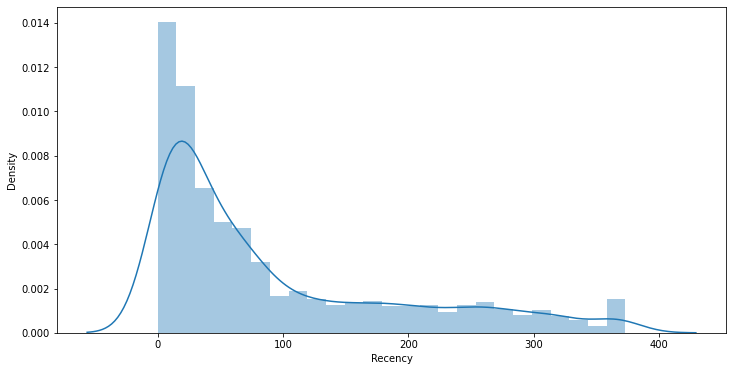

In [53]:
#Recency Distribution plot
plt.figure(figsize=(12,6))
sns.distplot(rfm_df['Recency'])

In [54]:
#Descriptive statistics of frequency
rfm_df.Frequency.describe([0.1, 0.25, 0.50,0.75,0.90,0.99])

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
10%         7.000000
25%        17.000000
50%        41.000000
75%       100.000000
90%       208.000000
99%       668.300000
max      7847.000000
Name: Frequency, dtype: float64

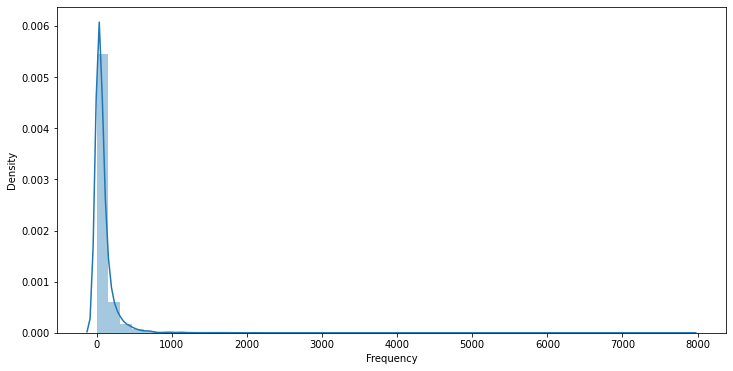

In [55]:
#Plotting frquency in rfm
plt.figure(figsize=(12,6))
sns.distplot(rfm_df['Frequency'])

In [56]:
#Descriptive statistics of monetary
rfm_df.Monetary.describe([0.1, 0.25, 0.50,0.75,0.90,0.99])

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
10%         156.699000
25%         307.415000
50%         674.485000
75%        1661.740000
90%        3646.531000
99%       19880.995700
max      280206.020000
Name: Monetary, dtype: float64

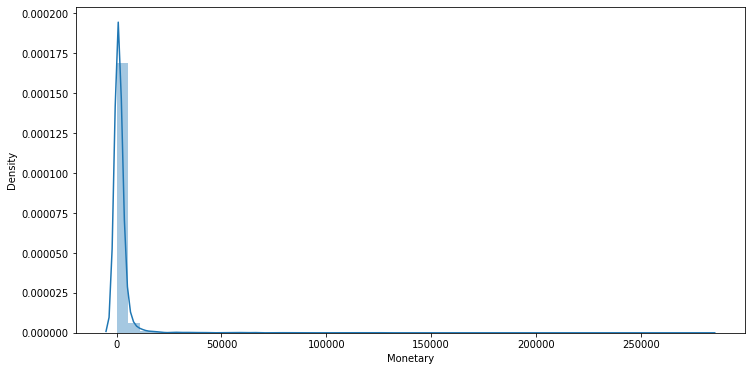

In [57]:
#Plotting distribution of monetary
plt.figure(figsize=(12,6))
sns.distplot(rfm_df['Monetary'])

In [58]:
#Splitting rfm into four segment using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75}}

In [59]:
#Function to create R, F and M segments
def RScoring(x,p,d):
  if x <=d[p][0.25]:
    return 1
  elif x <=d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScoring(x,p,d):
  if x  <=d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [60]:
#Adding R, F amd M segment values columns in existing rfm_df dataframe
rfm_df['R'] = rfm_df['Recency'].apply(RScoring,args=('Recency',quantiles))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring,args=('Monetary',quantiles))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [61]:
#Calculate sum in group
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate sum in score
rfm_df['RFMScore'] = rfm_df[['R','F','M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [62]:
rfm_df.describe()

,Recency,Frequency,Monetary,R,F,M,RFMScore
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.00000,4338.000000,4338.000000
mean,92.059474,91.720609,2054.266460,2.494237,2.50876,2.500000,7.502997
std,100.012264,228.785094,8989.230441,1.122059,1.12204,1.118369,2.815045
min,0.000000,1.000000,3.750000,1.000000,1.00000,1.000000,3.000000
25%,17.000000,17.000000,307.415000,1.000000,2.00000,1.250000,5.000000
50%,50.000000,41.000000,674.485000,2.000000,3.00000,2.500000,8.000000
75%,141.750000,100.000000,1661.740000,3.750000,4.00000,3.750000,10.000000
max,373.000000,7847.000000,280206.020000,4.000000,4.00000,4.000000,12.000000


In [63]:
#Handle negative value and zero value so to handle infinitive value with log transformation
def neg_n_zero(num):
  if num <=0:
    return 1

  else:
    return num

#Apply neg_zero function to recency and monetary columns
rfm_df['Recency'] = [neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [neg_n_zero(x) for x in rfm_df.Monetary]

#Perform log transformation to bring data into normal or near normal distribution
log_tfd_data = rfm_df[['Recency','Frequency','Monetary']].apply(np.log, axis=1).round(3)

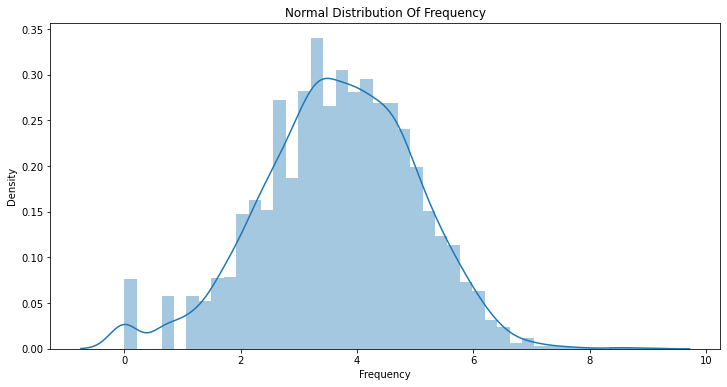

In [64]:
#Normal distribution of Frequency after log transformation
plt.figure(figsize=(12,6))
plt.title("Normal Distribution Of Frequency")
sns.distplot(log_tfd_data['Frequency'])

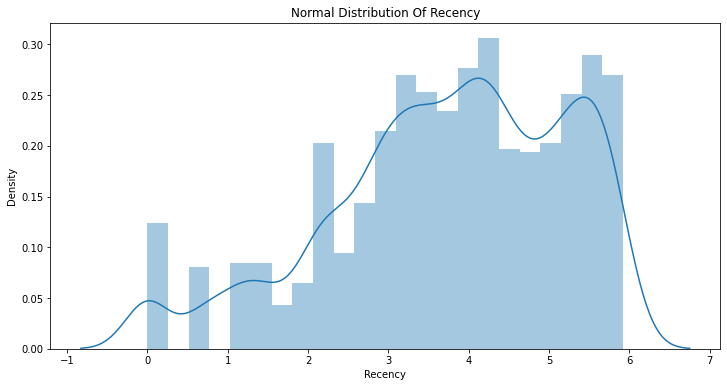

In [65]:
#Normal Distribution of Recency after log transformation
plt.figure(figsize=(12,6))
plt.title("Normal Distribution Of Recency")
sns.distplot(log_tfd_data['Recency'])

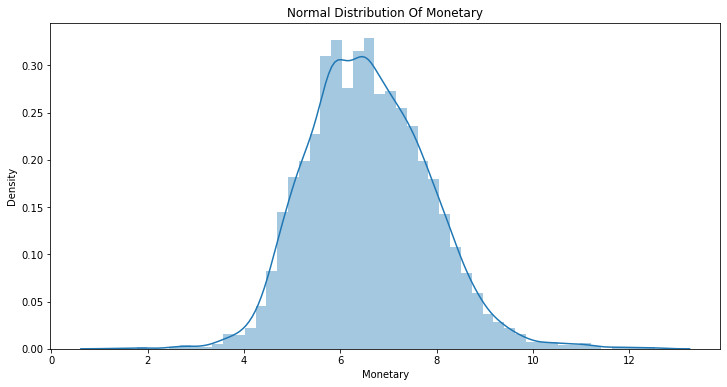

In [66]:
#Normal Distribution of Monetary after log transformation
plt.figure(figsize=(12,6))
plt.title("Normal Distribution Of Monetary")
sns.distplot(log_tfd_data['Monetary'])

In [67]:
#Converting the all rfm variable into log transformation
import math
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log) 
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,5.783825,0.000000,11.253942
12347.0,2,182,4310.00,1,1,1,111,3,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,3,3,1,331,7,4.317488,3.433987,7.494007
12349.0,18,73,1757.55,2,2,1,221,5,2.890372,4.290459,7.471676
12350.0,310,17,334.40,4,4,3,443,11,5.736572,2.833213,5.812338


#**Model Building**

##**K-Means Clustering**

In [68]:
#Importing required libraries 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Preprocessing for k mean and implimentation
x_features_rec_mon = rfm_df[['Recency_log','Monetary_log']].values
scal_rec_mon = StandardScaler()
x = scal_rec_mon.fit_transform(x_features_rec_mon)
range_n_cluster = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
for n_clusters in range_n_cluster:
  kmean_clust = KMeans(n_clusters=n_clusters)
  preds = kmean_clust.fit_predict(x)
  centers = kmean_clust.cluster_centers_

  score = silhouette_score(x,preds)
  print("For n_clusters = {}, silhoutte score is {}".format(n_clusters, score))

For n_clusters = 2, silhoutte score is 0.42117546415403984
For n_clusters = 3, silhoutte score is 0.3432957775914936
For n_clusters = 4, silhoutte score is 0.36494104664274657
For n_clusters = 5, silhoutte score is 0.3379186469024209
For n_clusters = 6, silhoutte score is 0.34444413446925776
For n_clusters = 7, silhoutte score is 0.34792396007001136
For n_clusters = 8, silhoutte score is 0.3371844246920387
For n_clusters = 9, silhoutte score is 0.3455886985465281
For n_clusters = 10, silhoutte score is 0.3463878911450937
For n_clusters = 11, silhoutte score is 0.3381147715894641
For n_clusters = 12, silhoutte score is 0.3432299953693625
For n_clusters = 13, silhoutte score is 0.33752224133368297
For n_clusters = 14, silhoutte score is 0.34805735069151555
For n_clusters = 15, silhoutte score is 0.33887471048970363
For n_clusters = 16, silhoutte score is 0.33622529972427584


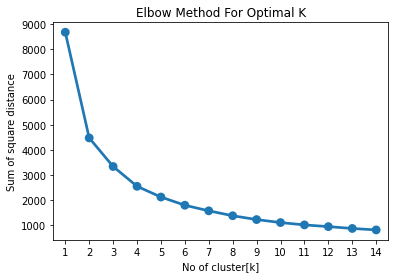

In [69]:
#plotting Elbow chart
sum_of_sq_dt = {}
for k in range(1,15):
  km = KMeans(n_clusters= k, init='k-means++', max_iter=1000)
  km = km.fit(x)
  sum_of_sq_dt[k] = km.inertia_

sns.pointplot(x=list(sum_of_sq_dt.keys()), y = list(sum_of_sq_dt.values()))
plt.title("Elbow Method For Optimal K")
plt.xlabel('No of cluster[k]')
plt.ylabel("Sum of square distance")
plt.show()

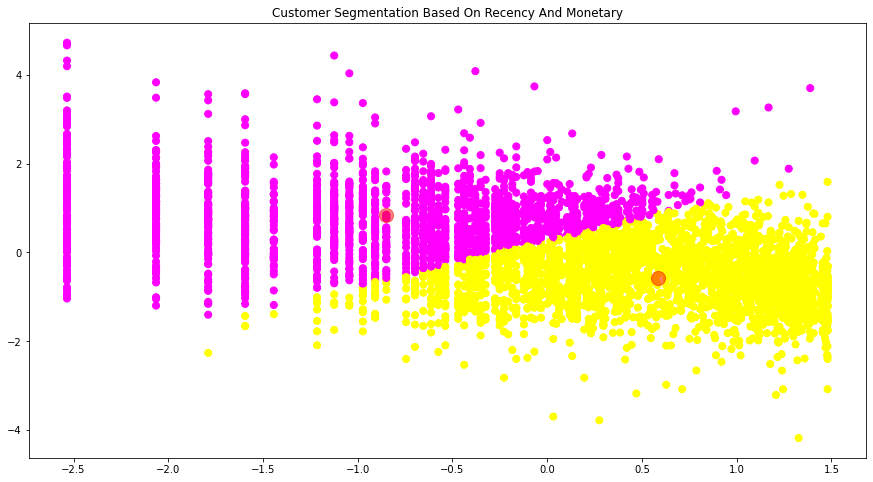

In [70]:
#Implimenting kmeans with optimized k value
kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(x)

#Plotting the revised k value model
plt.figure(figsize=(15,8))
plt.title('Customer Segmentation Based On Recency And Monetary')
plt.scatter(x[:,0],x[:,1], c=y_kmeans, s=50, cmap='spring')


centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red',s=200, alpha=0.5)

##**DBSCAN**

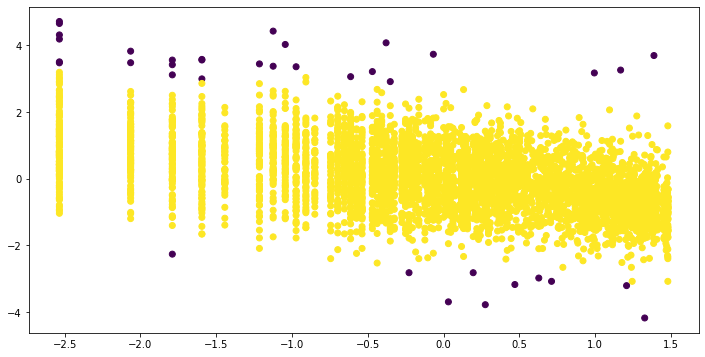

In [71]:
#Implimenting DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
ypred = DBSCAN(eps=0.5, min_samples=15).fit_predict(x)
plt.figure(figsize=(12,6))
plt.scatter(x[:,0],x[:,1], c=ypred)


In [72]:
#Applying the silhoutte score method on freequency and monetary
xfm = rfm_df[['Frequency_log','Monetary_log']]
sc = StandardScaler()
xfm = sc.fit_transform(xfm)
range_n_cluster = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_cluster:
  clusterer = KMeans(n_clusters=n_clusters)
  pred = clusterer.fit_predict(xfm)
  centers = clusterer.cluster_centers_


  score = silhouette_score(x,pred)
  print("For n_cluster = {}, silhouette score is {}".format(n_clusters, score))

For n_cluster = 2, silhouette score is 0.32448028212295477
For n_cluster = 3, silhouette score is 0.1833009261099422
For n_cluster = 4, silhouette score is 0.10976172728738341
For n_cluster = 5, silhouette score is 0.07315185159124757
For n_cluster = 6, silhouette score is 0.06068851194330963
For n_cluster = 7, silhouette score is 0.036838289802200316
For n_cluster = 8, silhouette score is 0.014533251715068503
For n_cluster = 9, silhouette score is 0.007176407499782753
For n_cluster = 10, silhouette score is -0.0012546520061162624
For n_cluster = 11, silhouette score is -0.00437753118107014
For n_cluster = 12, silhouette score is -0.011895816715859956
For n_cluster = 13, silhouette score is -0.018521066138927733
For n_cluster = 14, silhouette score is -0.024683566366875007
For n_cluster = 15, silhouette score is -0.03630558525973071


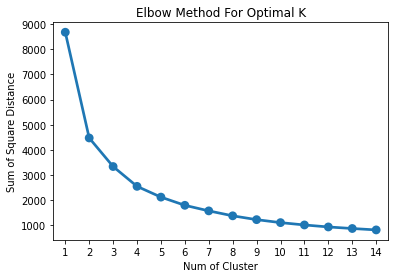

In [73]:
#Plotting elbow method for optimal k
from sklearn.cluster import KMeans
sum_of_sq_dist = {}
for k in range(1,15):
  km = KMeans(n_clusters = k, init='k-means++', max_iter=1000)
  km = km.fit(x)
  sum_of_sq_dt[k] = km.inertia_
  
#Plot the graph for the sum of square distance values and Number of Cluster
sns.pointplot(x=list(sum_of_sq_dt.keys()), y = list(sum_of_sq_dt.values()))
plt.xlabel('Num of Cluster')
plt.ylabel('Sum of Square Distance')
plt.title('Elbow Method For Optimal K')
plt.show()

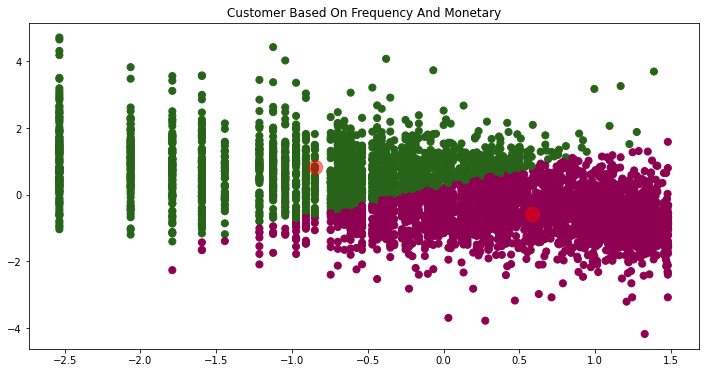

In [74]:
#Plotting graph on segmentaion of customer by Frequency and Monetary
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(x)
y_kmeans = kmeans.predict(x)

plt.figure(figsize=(12,6))
plt.title("Customer Based On Frequency And Monetary")
plt.scatter(x[:, 0], x[:,1], c=y_kmeans,s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha= 0.5)

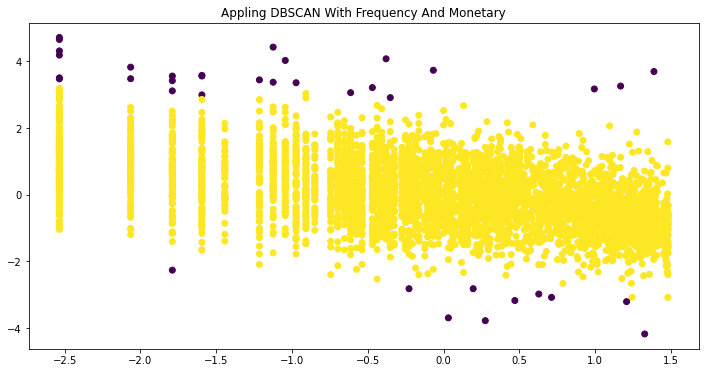

In [75]:
#Appling the DBSCAN on Frequency and Monetary
from sklearn.cluster import DBSCAN
y_pred = DBSCAN(eps = 0.5, min_samples=15).fit_predict(x)
plt.figure(figsize=(12,6))
plt.title("Appling DBSCAN With Frequency And Monetary")
plt.scatter(x[:,0], x[:,1], c=y_pred)

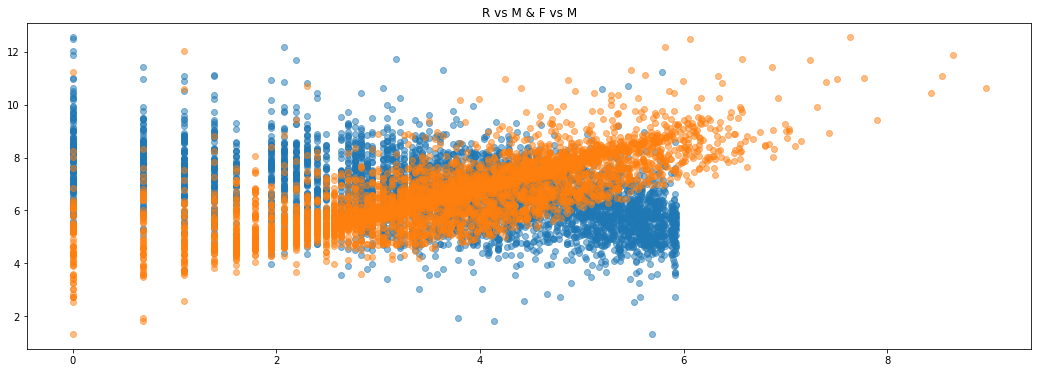

In [76]:
#Checking the relationship of R vs M and F vs M
plt.figure(figsize=(18,6))
plt.title("R vs M & F vs M")
plt.scatter(rfm_df.Recency_log, rfm_df.Monetary_log, alpha=0.5)
plt.scatter(rfm_df.Frequency_log, rfm_df.Monetary_log, alpha=0.5)

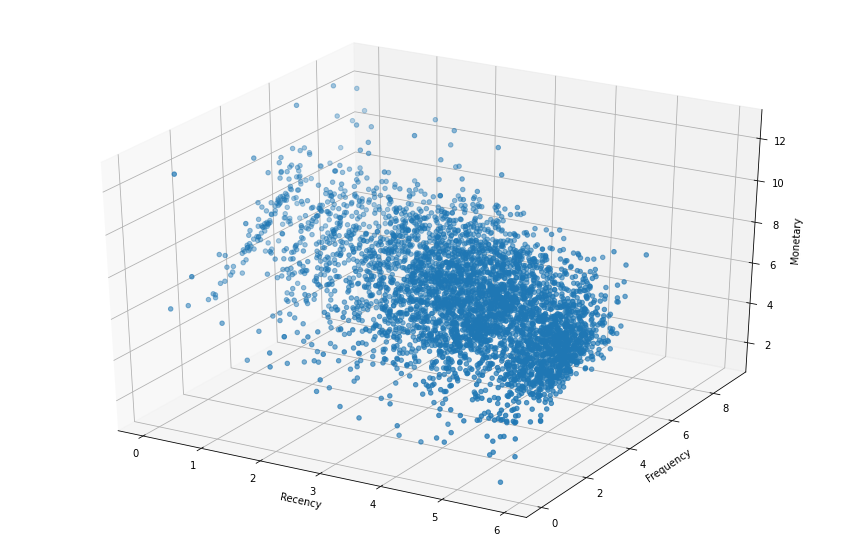

In [78]:
#Plotting 3D Visualization of Frequency, Recency and Monetary
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection= '3d')
xs = rfm_df.Recency_log
ys = rfm_df.Frequency_log
zs = rfm_df.Monetary_log
ax.scatter(xs,ys,zs)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()
